## Description

这个脚本主要用于分析SNN中不同层的时空稀疏率。

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from tqdm import tqdm
import json
from collections import defaultdict
import re
import itertools
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']

In [28]:
def vis_sparsity(trace_dir, Timesteps, io_type: str):
    # io_type == "input" or "output"
    output_file = []
    for fname in os.listdir(trace_dir):
        if io_type in fname:
            file_path = os.path.join(trace_dir, fname)
            output_file.append(file_path)
    # print(output_file)

    spatial_fire_rate = {}
    temporal_fire_rate = {}
    for file in output_file:
        layer = '_'.join(file.split('.')[-4:-2])
        print(file, layer)
        data = np.genfromtxt(file, delimiter=',')
        # print(data.shape)
        if len(data.shape) == 3:    # conv layer
            data = data.reshape(Timesteps, -1, data.shape[1])
            # 分析空间局部性        
            spatial_fire_rate[layer] = list(np.sum(np.sum(data != 0, axis=2), axis=1) / [dataT.size for dataT in data])
            # 分析时间局部性
            temporal_fire_rate[layer] = list(np.sum(data != 0, axis=0) / Timesteps)
        else:  # fc layer
            data = data.reshape(Timesteps, -1)
            # 分析空间局部性
            spatial_fire_rate[layer] = list(np.sum(data != 0, axis=1) / [dataT.size for dataT in data])
            # 分析时间局部性
            temporal_fire_rate[layer] = list(np.sum(data != 0, axis=0) / Timesteps)
    print(len(spatial_fire_rate))
    print(len(temporal_fire_rate))
    plot_cdf(spatial_fire_rate)
    plot_cdf(temporal_fire_rate)
    return spatial_fire_rate, temporal_fire_rate

def plot_pdf(data, title: str=None):
    color_bar2 = ["#2a9d8f", "#F6BD60", "#457b9d", "#F07167", "#BFA6A2", "#A1CD5A", "#ED7D31"]
    fig, ax = plt.subplots(figsize=(6, 2), dpi=100)
    # 为了绘制平滑的曲线，生成一个包含更多点的数据范围
    x = np.linspace(0, 1, 1000)
    unique_keys = sorted(list(data.keys()))
    # print(unique_keys)
    # for key, val in data.items():
    for idx, key in enumerate(unique_keys):
        # 计算这些点的PDF值
        pdf = norm.pdf(x, loc=np.mean(data[key]), scale=np.std(data[key]))
    
        # 绘制PDF曲线
        plt.plot(x, pdf, label=key, linewidth=2, color=color_bar2[idx])
    # plt.title('Probability Density Function')
    plt.xlabel('Fire Rate')
    plt.ylabel('Probability Density')
    plt.legend()
    if title:
        plt.savefig(f'results/{title}_pdf.pdf', bbox_inches='tight')
    # 显示图形
    plt.show()

def plot_cdf(data, title: str=None):    
    color_bar2 = ["#2a9d8f", "#F6BD60", "#457b9d", "#F07167", "#BFA6A2", "#A1CD5A", "#ED7D31"]
    fig, ax = plt.subplots(figsize=(6, 2), dpi=100)
    # 为了绘制平滑的曲线，生成一个包含更多点的数据范围
    x = np.linspace(0, 1, 1000)

    unique_keys = sorted(list(data.keys()))
    # print(unique_keys)
    # for key, val in data.items():
    for idx, key in enumerate(unique_keys):
        # 计算这些点的PDF值
        cdf = norm.cdf(x, loc=np.mean(data[key]), scale=np.std(data[key]))
    
        # 绘制PDF曲线
        plt.plot(x, cdf, label=key, linewidth=2, color=color_bar2[idx])
    # plt.title('Probability Density Function')
    plt.xlabel('Fire Rate')
    plt.ylabel('Probability Density')
    plt.legend()
    if title:
        plt.savefig(f'results/{title}_cdf.pdf', bbox_inches='tight')

    # 显示图形
    plt.show()

In [3]:
trace_dir = "/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_CIFAR10DVS/"
Timesteps = 100

In [ ]:
spatial_fire_rate, temporal_fire_rate = vis_sparsity(trace_dir, Timesteps, "output")

with open('results/cifar10dvs_T100_output_spatial_fire_rate.json', 'w') as fw:
	json.dump(spatial_fire_rate, fw, indent=4)
with open('results/cifar10dvs_T100_output_temporal_fire_rate.json', 'w') as fw:
	json.dump(temporal_fire_rate, fw, indent=4)

In [ ]:
spatial_fire_rate, temporal_fire_rate = vis_sparsity(trace_dir, Timesteps, "input")

with open('results/cifar10dvs_T100_input_spatial_fire_rate.json', 'w') as fw:
	json.dump(spatial_fire_rate, fw, indent=4)
with open('results/cifar10dvs_T100_input_temporal_fire_rate.json', 'w') as fw:
	json.dump(temporal_fire_rate, fw, indent=4)

In [4]:
trace_dir = "/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/"
Timesteps = 300

/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/output.L3.conv.plif.csv L3_conv
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/output.L7.fc.plif.csv L7_fc
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/output.L2.conv.plif.csv L2_conv
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/output.L4.conv.plif.csv L4_conv
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/output.L6.fc.plif.csv L6_fc
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/output.L5.conv.plif.csv L5_conv
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/output.L1.conv.plif.csv L1_conv
7
7


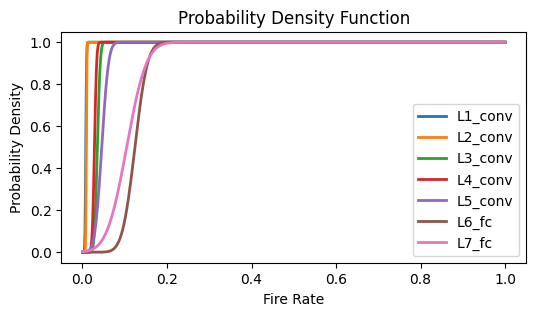

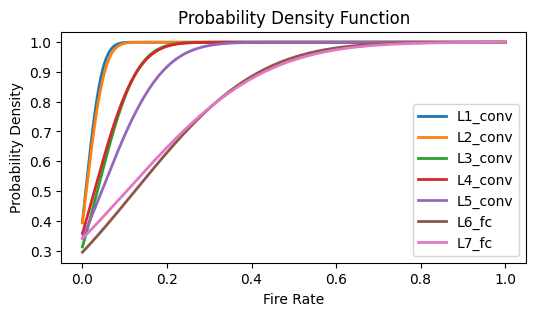

In [5]:
spatial_fire_rate_go, temporal_fire_rate_go = vis_sparsity(trace_dir, Timesteps, "output")

with open('results/dvs128guester_T300_output_spatial_fire_rate.json', 'w') as fw:
	json.dump(spatial_fire_rate_go, fw, indent=4)
with open('results/dvs128guester_T300_output_temporal_fire_rate.json', 'w') as fw:
	json.dump(temporal_fire_rate_go, fw, indent=4)

/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/input.L3.conv.conv2d.csv L3_conv
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/input.L5.conv.conv2d.csv L5_conv
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/input.L6.fc.linear.csv L6_fc
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/input.L7.fc.linear.csv L7_fc
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/input.L4.conv.conv2d.csv L4_conv
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/input.L1.conv.conv2d.csv L1_conv
/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_DVS128Gesture/input.L2.conv.conv2d.csv L2_conv
7
7


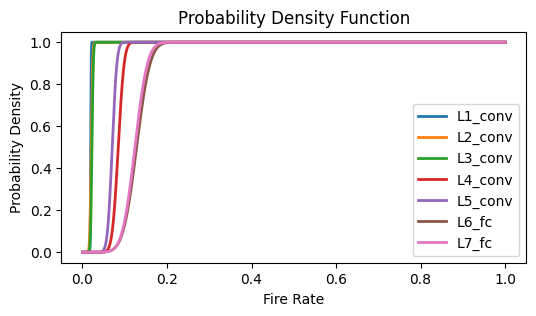

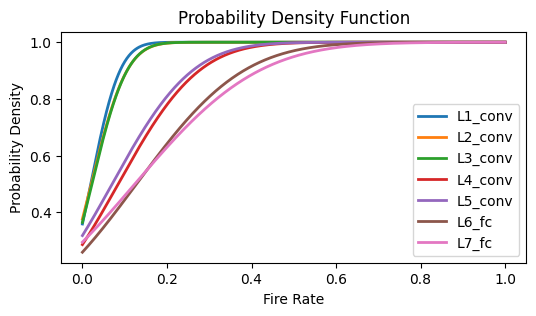

In [6]:
spatial_fire_rate_gi, temporal_fire_rate_gi = vis_sparsity(trace_dir, Timesteps, "input")

with open('results/dvs128guester_T300_input_spatial_fire_rate.json', 'w') as fw:
	json.dump(spatial_fire_rate_gi, fw, indent=4)
with open('results/dvs128guester_T300_input_temporal_fire_rate.json', 'w') as fw:
	json.dump(temporal_fire_rate_gi, fw, indent=4)

## 可视化

In [7]:
cifar10dvs_in_spatial = "results/cifar10dvs_T100_input_spatial_fire_rate.json"
cifar10dvs_in_temporal = "results/cifar10dvs_T100_input_temporal_fire_rate.json"

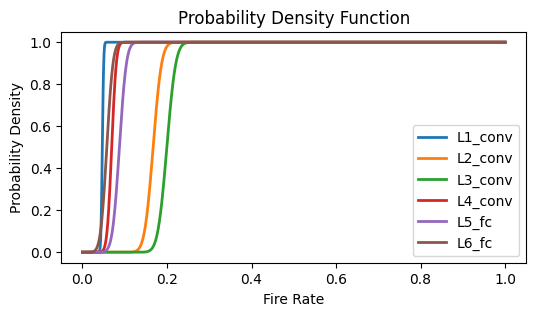

In [8]:
with open(cifar10dvs_in_spatial, 'r') as openfile:
    cis = json.load(openfile)
plot_cdf(cis)

In [9]:
with open(cifar10dvs_in_temporal, 'r') as openfile:
    cit = json.load(openfile)

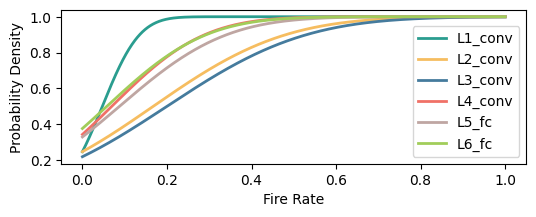

In [30]:
plot_cdf(cit, "cifar10dvs_T100_input_temporal_fire_rate")

In [11]:
dvs128gesture_in_spatial = "results/dvs128guester_T300_input_spatial_fire_rate.json"
dvs128gesture_in_temporal = "results/dvs128guester_T300_input_temporal_fire_rate.json"

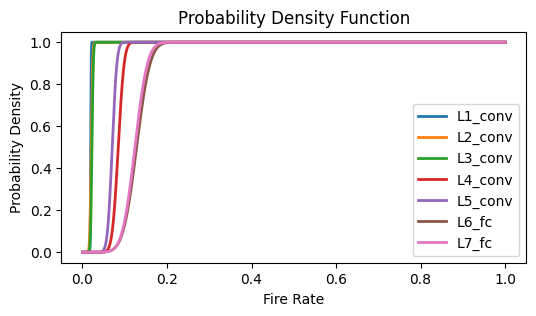

In [12]:
with open(dvs128gesture_in_spatial, 'r') as openfile:
    dis = json.load(openfile)
plot_cdf(dis)

In [13]:
with open(dvs128gesture_in_temporal, 'r') as openfile:
    dit = json.load(openfile)

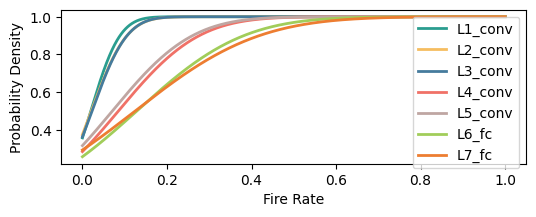

In [29]:
plot_cdf(dit, "dvs128gesture_T300_input_temporal")

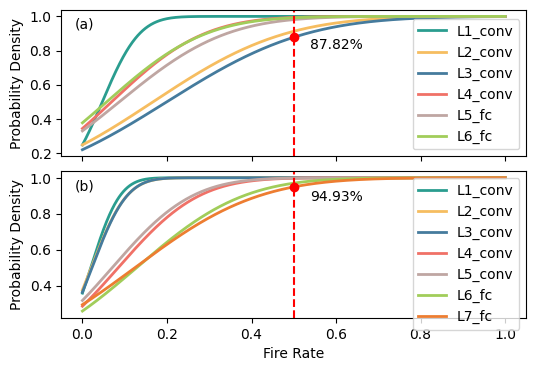

In [50]:
color_bar2 = ["#2a9d8f", "#F6BD60", "#457b9d", "#F07167", "#BFA6A2", "#A1CD5A", "#ED7D31"]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), dpi=100, sharex=True)

data = cit
# 为了绘制平滑的曲线，生成一个包含更多点的数据范围
x = np.linspace(0, 1, 1000)

unique_keys = sorted(list(data.keys()))
# print(unique_keys)
# for key, val in data.items():
min_yval_at_05_c = 1
for idx, key in enumerate(unique_keys):
    # 计算这些点的PDF值
    cdf = norm.cdf(x, loc=np.mean(data[key]), scale=np.std(data[key]))

    # 绘制PDF曲线
    ax1.plot(x, cdf, label=key, linewidth=2, color=color_bar2[idx])
    yval_at_05_c = cdf[np.searchsorted(x, 0.5)]
    if yval_at_05_c < min_yval_at_05_c:
        min_yval_at_05_c = yval_at_05_c
# plt.title('Probability Density Function')
# ax1.set_xlabel('Fire Rate')
ax1.set_ylabel('Probability Density')
ax1.legend()

data = dit
# 为了绘制平滑的曲线，生成一个包含更多点的数据范围
x = np.linspace(0, 1, 1000)

unique_keys = sorted(list(data.keys()))
# print(unique_keys)
# for key, val in data.items():
min_yval_at_05_d = 1
for idx, key in enumerate(unique_keys):
    # 计算这些点的PDF值
    cdf = norm.cdf(x, loc=np.mean(data[key]), scale=np.std(data[key]))

    # 绘制PDF曲线
    ax2.plot(x, cdf, label=key, linewidth=2, color=color_bar2[idx])
    yval_at_05_d = cdf[np.searchsorted(x, 0.5)]
    if yval_at_05_d < min_yval_at_05_d:
        min_yval_at_05_d = yval_at_05_d
# plt.title('Probability Density Function')
ax2.set_xlabel('Fire Rate')
ax2.set_ylabel('Probability Density')
ax2.legend()

ax1.axvline(x=0.5, color='r', linestyle='--')
ax2.axvline(x=0.5, color='r', linestyle='--')
ax1.plot(0.5, min_yval_at_05_c, 'ro')
ax1.text(0.6, 0.9 * min_yval_at_05_c, f'{min_yval_at_05_c*100:.2f}%', horizontalalignment='center', verticalalignment='bottom')
ax2.plot(0.5, min_yval_at_05_d, 'ro')
ax2.text(0.6, 0.9 * min_yval_at_05_d, f'{min_yval_at_05_d*100:.2f}%', horizontalalignment='center', verticalalignment='bottom')



ax1.text(0.05, 0.9, '(a)', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.05, 0.9, '(b)', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
# 缩小两个子图之间的间距
plt.subplots_adjust(hspace=0.1)

plt.savefig(f'results/temporal_sparsity_cdf.pdf', bbox_inches='tight')

# 显示图形
plt.show()

## 输入稀疏率和输出稀疏率利用率分析

在SNN中，前置神经元的输出会当作后置神经元的输入。因此，输入和输出稀疏率相等。
但是，输入稀疏率只有在整个感知域全为0的情况下，可以跳过该感知域的计算，因此输入稀疏率的利用率为$SR^{PF}$，其中SR为输入稀疏率，$PF=C_{in} \times K \times K$为感知域大小。
首先对输入进行分析，统计可用输入稀疏率。
其次，对输出稀疏率进行分析，统计输出稀疏率。

In [17]:
import trace


def input_perception_field_sparsity(trace_log, time_step, time_window):
    # 读取trace_log
    trace_data = pd.read_csv(trace_log, header=None)
    # dataframe to numpy array
    trace_data = trace_data.to_numpy().reshape(time_step, -1, trace_data.shape[1])  # (time_step, Cin*K*K, H*W)
    # 继续按照时间窗口划分
    # 首先，padding trace_data到tw的倍数
    padding_size = time_window - trace_data.shape[0] % time_window
    if padding_size != 0 and time_window != 1:
        trace_data = np.pad(trace_data, ((0, padding_size), (0, 0), (0, 0)), 'constant', constant_values=0)
    trace_data = trace_data.reshape(-1, time_window, trace_data.shape[1], trace_data.shape[2])  # (time_step, time_window, Cin*K*K, H*W)
    # 计算输入稀疏率
    pf_sum = np.sum(np.sum(trace_data, axis=2), axis=1)
    input_sparsity = np.sum(pf_sum == 0) / pf_sum.size
    # print(input_sparsity)
    return input_sparsity

def output_sparsity(trace_log, time_step, time_window):
    # 读取trace_log
    trace_data = pd.read_csv(trace_log, header=None)
    # dataframe to numpy array
    trace_data = trace_data.to_numpy().reshape(time_step, -1, trace_data.shape[1])  # (time_step, H*W, Cout)
    # 继续按照时间窗口划分
    # 首先，padding trace_data到tw的倍数
    padding_size = time_window - trace_data.shape[0] % time_window
    if padding_size != 0 and time_window != 1:
        trace_data = np.pad(trace_data, ((0, padding_size), (0, 0), (0, 0)), 'constant', constant_values=0)
    trace_data = trace_data.reshape(-1, time_window, trace_data.shape[1], trace_data.shape[2])  # (time_step, time_window, Cin*K*K, H*W)
    # # 计算输出稀疏率
    output_sparsity = np.sum(np.sum(trace_data, axis=1) == 0) / (trace_data.size / time_window)
    # print(f"{output_sparsity=}")
    return output_sparsity

In [6]:
data_dir = "/root/ReRAM_SNN_Acce/PyNeuroSim/layer_record_IMAGENET/"
T = 100

In [8]:
out_sparsiry = defaultdict(dict)
out_pat = r"output.(L[0-9]+).conv.plif.csv"
for file in tqdm(os.listdir(data_dir)):
    res = re.findall(out_pat, file)
    # print(file)
    if len(res) and res[0] != "L1" and res[0] != "L18":
        for tw in [1, 2, 4, 8, 16, 32, 64]:
            out_sparsiry[res[0]][tw] = output_sparsity(os.path.join(data_dir, file), T, tw)
print(out_sparsiry)

with open('results/imagenet_T100_output_sparsity.json', 'w') as fw:
	json.dump(out_sparsiry, fw, indent=4)

100%|██████████| 54/54 [01:12<00:00,  1.35s/it]

defaultdict(<class 'dict'>, {'L3': {1: 0.8422767857142858, 2: 0.7213358976403061, 4: 0.5756912590757457, 8: 0.44354334281789637, 16: 0.3852126229956268, 32: 0.37179129464285715, 64: 0.3055395009566326}, 'L13': {1: 0.9424916294642857, 2: 0.8886144301470589, 4: 0.7926468063186813, 8: 0.6520585998822606, 16: 0.5388802842565598, 32: 0.4912209024234694, 64: 0.3605110012755102}, 'L16': {1: 0.9770551658163266, 2: 0.955014036864746, 4: 0.9123255371860283, 8: 0.835275215855573, 16: 0.7545610878279884, 32: 0.6920539700255102, 64: 0.5745974170918368}, 'L7': {1: 0.9344772401147959, 2: 0.8768638314700881, 4: 0.7929480536204867, 8: 0.7003915448390895, 16: 0.6447476311953353, 32: 0.6244095782844388, 64: 0.5521364795918368}, 'L15': {1: 0.9687934470663265, 2: 0.9389552696078431, 4: 0.8840895432692307, 8: 0.7967002305729984, 16: 0.7136024052478134, 32: 0.6597476881377551, 64: 0.5484295280612245}, 'L8': {1: 0.9536576251594387, 2: 0.9097519867321929, 4: 0.8347348103905023, 8: 0.7393773915816326, 16: 0.672

In [19]:
in_sparsity = defaultdict(dict)
in_pat = r"input.(L[0-9]+).conv.conv2d.csv"
for file in tqdm(os.listdir(data_dir)):
    res = re.findall(in_pat, file)
    if len(res) and res[0] != "L1" and res[0] != "L18":
        for tw in [1, 2, 4, 8, 16, 32, 64]:
            in_sparsity[res[0]][tw] = input_perception_field_sparsity(os.path.join(data_dir, file), T, tw)
print(in_sparsity)
with open('results/imagenet_T100_input_perception_fild_sparsity.json', 'w') as fw:
	json.dump(in_sparsity, fw, indent=4)

100%|██████████| 54/54 [14:47<00:00, 16.44s/it]

defaultdict(<class 'dict'>, {'L3': {1: 0.03704400510204082, 2: 0.04009103641456583, 4: 0.046617445054945056, 8: 0.0, 16: 0.0, 32: 0.0, 64: 0.0}, 'L10': {1: 0.03168367346938775, 2: 0.04721888755502201, 4: 0.05337519623233909, 8: 0.0, 16: 0.0, 32: 0.0, 64: 0.0}, 'L5': {1: 0.029626913265306122, 2: 0.04185424169667867, 4: 0.048334478021978024, 8: 0.0, 16: 0.0, 32: 0.0, 64: 0.0}, 'L17': {1: 0.11142857142857143, 2: 0.12364945978391356, 4: 0.1271585557299843, 8: 0.07692307692307693, 16: 0.0, 32: 0.0, 64: 0.0}, 'L8': {1: 0.03163265306122449, 2: 0.047368947579031616, 4: 0.054111067503924644, 8: 0.0, 16: 0.0, 32: 0.0, 64: 0.0}, 'L11': {1: 0.052806122448979594, 2: 0.06732693077230892, 4: 0.07810047095761381, 8: 0.002354788069073783, 16: 0.0, 32: 0.0, 64: 0.0}, 'L9': {1: 0.04512755102040816, 2: 0.05824829931972789, 4: 0.06823979591836735, 8: 9.811616954474098e-05, 16: 0.0, 32: 0.0, 64: 0.0}, 'L16': {1: 0.07673469387755102, 2: 0.09003601440576231, 4: 0.0989010989010989, 8: 0.04395604395604396, 16: 

In [2]:
# 绘制柱状图，对比每一层两种稀疏率
with open("results/imagenet_T100_input_perception_fild_sparsity.json", 'r') as openfile:
    in_sp = json.load(openfile)
print(in_sp)
with open("results/imagenet_T100_output_sparsity.json", 'r') as openfile:
    out_sp = json.load(openfile)
print(out_sp)

{'L3': {'1': 0.03704400510204082, '2': 0.04009103641456583, '4': 0.046617445054945056, '8': 0.0, '16': 0.0, '32': 0.0, '64': 0.0}, 'L10': {'1': 0.03168367346938775, '2': 0.04721888755502201, '4': 0.05337519623233909, '8': 0.0, '16': 0.0, '32': 0.0, '64': 0.0}, 'L5': {'1': 0.029626913265306122, '2': 0.04185424169667867, '4': 0.048334478021978024, '8': 0.0, '16': 0.0, '32': 0.0, '64': 0.0}, 'L17': {'1': 0.11142857142857143, '2': 0.12364945978391356, '4': 0.1271585557299843, '8': 0.07692307692307693, '16': 0.0, '32': 0.0, '64': 0.0}, 'L8': {'1': 0.03163265306122449, '2': 0.047368947579031616, '4': 0.054111067503924644, '8': 0.0, '16': 0.0, '32': 0.0, '64': 0.0}, 'L11': {'1': 0.052806122448979594, '2': 0.06732693077230892, '4': 0.07810047095761381, '8': 0.002354788069073783, '16': 0.0, '32': 0.0, '64': 0.0}, 'L9': {'1': 0.04512755102040816, '2': 0.05824829931972789, '4': 0.06823979591836735, '8': 9.811616954474098e-05, '16': 0.0, '32': 0.0, '64': 0.0}, 'L16': {'1': 0.07673469387755102, '2'

In [3]:
len(out_sp)

16

In [51]:
from matplotlib.pyplot import xticks


unique_layers = sorted(list(out_sp.keys()), key=lambda x: int(x[1:]))

vis_tw = [1, 8, 16, 64]
vis_in_sp = []
vis_out_sp = []
xticks = []
geomean_speedup = []
geomean_text_loc = []
for tw in vis_tw:
    vis_in_sp.extend([in_sp[layer][str(tw)] for layer in unique_layers])
    in_geomean = np.mean([in_sp[layer][str(tw)] for layer in unique_layers])
    vis_in_sp.append(in_geomean)
    vis_in_sp.append(0)
    vis_out_sp.extend([out_sp[layer][str(tw)] for layer in unique_layers])
    out_geomean = np.mean([out_sp[layer][str(tw)] for layer in unique_layers])
    vis_out_sp.append(out_geomean)
    vis_out_sp.append(0)
    xticks.extend(unique_layers)
    xticks.append('Geomean')
    xticks.append('')
    # if np.mean([in_sp[layer][str(tw)] for layer in unique_layers]) == 0:
    #     geomean_speedup.append('')   
    # else:
    #     geomean_speedup.append(np.mean([out_sp[layer][str(tw)] for layer in unique_layers]) / np.mean([in_sp[layer][str(tw)] for layer in unique_layers]))
    geomean_speedup.append(f"{in_geomean*100:.1f}% vs. {out_geomean*100:.1f}%")
    geomean_text_loc.append(np.mean([out_sp[layer][str(tw)] for layer in unique_layers]))


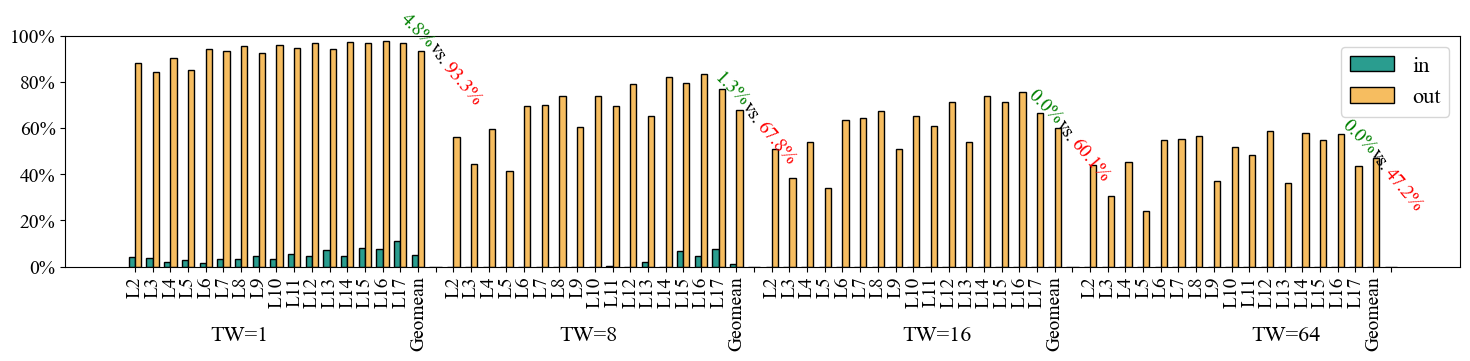

In [66]:
color_bar2 = ["#2a9d8f", "#F6BD60", "#457b9d", "#F07167", "#BFA6A2", "#A1CD5A", "#ED7D31"]
bar_width = 0.35
index_in = np.arange(len(vis_out_sp))
index_out = index_in + bar_width

fig, ax = plt.subplots(figsize=(18, 3))
plt.bar(index_in, vis_in_sp, bar_width, color=color_bar2[0], label="in", edgecolor='black')
plt.bar(index_out, vis_out_sp, bar_width, color=color_bar2[1], label="out", edgecolor='black')

plt.xticks(index_in + bar_width / 2, xticks, rotation=90, fontsize=14)
plt.yticks(fontsize=14)

from matplotlib import ticker
from sympy import rotations
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
plt.ylim(0, 1)
# for i in range(1, len(vis_tw), 1):
#     plt.axvline(x=i * len(unique_layers) + 0.8 * i - 0.2, color='r', linestyle='--')
for i, tw in enumerate(vis_tw):
    plt.text((i+0.5) / len(vis_tw), -0.3, f"TW={tw}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=16)
    # if geomean_speedup[i] != '':
    #     if i == 0:
    #         plt.text(1.05 * (i+1) / len(vis_tw), 1.05 * geomean_text_loc[i], f"{geomean_speedup[i]:.2f}x", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')
    #     else:
    #         plt.text(0.98 * (i+1) / len(vis_tw), 1.05 * geomean_text_loc[i], f"{geomean_speedup[i]:.2f}x", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')
    geomean_speedup_slice = geomean_speedup[i].split(' ')
    plt.text((i+0.75 + 0.1 * (3-i)) / len(vis_tw) - 0.01, 0.04 + geomean_text_loc[i] + 0.05, f"{geomean_speedup_slice[0]}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='g', fontsize=14, rotation=-45)
    plt.text((i+0.75 + 0.1 * (3-i)) / len(vis_tw) + 0.005, 0.04 + geomean_text_loc[i] - 0.05, f"{geomean_speedup_slice[1]}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='k', fontsize=14, rotation=-58)
    plt.text((i+0.75 + 0.1 * (3-i)) / len(vis_tw) + 0.022, 0.04 + geomean_text_loc[i] - 0.18, f"{geomean_speedup_slice[2]}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='r', fontsize=14, rotation=-50)
plt.legend(fontsize=16)
plt.savefig(f'results/imagenet_sparsity_utilization.pdf', bbox_inches='tight')